<a href="https://colab.research.google.com/github/dananjayakumar/Ic-engine/blob/main/Copy_of_Copy_of_biodiesel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**:

Evaluation of performance and emissions characteristics of IC Engine for different operating parameters by using different biodiesels with various proportions of hydrogen peroxide as additive

In [ ]:
from google.colab import files
upload=files.upload

# <font color=green>Importing & analyzing the data

<font color=red>***Importing the required Library***

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
import math
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<font color=red>Import the dataset

In [ ]:
path ='/content/Biodiesel Dataset.xlsx'
df = pd.read_excel(path)
df.head()

Sl.No    Fuel    IOP  Load (kg)  B.P(kw)  BSFC(kg/kw.hr)  BTE (%)  \
0    NaN     NaN    NaN        NaN      NaN             NaN      NaN   
1    1.0  Diesel  200.0      0.000     0.00        0.000000     0.00   
2    2.0  Diesel  200.0      2.667     0.74        0.845865    10.40   
3    3.0  Diesel  200.0      5.330     1.48        0.481180    16.80   
4    4.0  Diesel  200.0      8.003     2.22        0.361156    21.35   

   NOX (PPM)  CO(%Vol)  CO2(%Vol)  HC (PPM)  SMOKE (HSU)  EGT (0C)  
0        NaN       NaN        NaN       NaN          NaN       NaN  
1      138.0      0.05       2.70      19.0         22.0     210.0  
2      265.0      0.06       3.32      20.0         25.0     270.0  
3      410.0      0.06       4.92      24.0         36.0     320.0  
4      590.0      0.07       5.80      26.0         48.0     375.0

In [ ]:
df.shape

(361, 13)

<font color=blue>Inferences:
1. This dataset contains 361 rows and 13 columns
2. BTE is the target column
3. Its a regression problem

In [ ]:
df.columns

Index(['Sl.No', 'Fuel', 'IOP', 'Load (kg)', 'B.P(kw)', 'BSFC(kg/kw.hr)',
       'BTE (%)', 'NOX (PPM)', 'CO(%Vol)', 'CO2(%Vol)', 'HC (PPM)',
       'SMOKE (HSU)', 'EGT (0C)'],
      dtype='object')


# <font color=green>Feature engineering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sl.No           360 non-null    float64
 1   Fuel            360 non-null    object 
 2   IOP             360 non-null    float64
 3   Load (kg)       360 non-null    float64
 4   B.P(kw)         360 non-null    float64
 5   BSFC(kg/kw.hr)  360 non-null    float64
 6   BTE (%)         360 non-null    float64
 7   NOX (PPM)       360 non-null    float64
 8   CO(%Vol)        360 non-null    float64
 9   CO2(%Vol)       360 non-null    float64
 10  HC (PPM)        360 non-null    float64
 11  SMOKE (HSU)     360 non-null    float64
 12  EGT (0C)        360 non-null    float64
dtypes: float64(12), object(1)
memory usage: 36.8+ KB


<font color=blue>Inferences:
This dataset contains one feature with object datatype and remaining all are float datatype

In [ ]:
df.isnull().sum()

Sl.No             1
Fuel              1
IOP               1
Load (kg)         1
B.P(kw)           1
BSFC(kg/kw.hr)    1
BTE (%)           1
NOX (PPM)         1
CO(%Vol)          1
CO2(%Vol)         1
HC (PPM)          1
SMOKE (HSU)       1
EGT (0C)          1
dtype: int64

<font color=blue>Inferences:
1. all the column is having one null values

<font color=red> Droping the null row

In [ ]:
df = df.drop([df.index[0]])

In [ ]:
[i for i in df.columns if df[i].isnull().sum()>0]

[]

<font color=red> The descrptive stats of the data set has shown below

In [ ]:
df.describe().T

count        mean         std       min         25%  \
Sl.No           360.0  180.500000  104.067286    1.0000   90.750000   
IOP             360.0  205.000000    4.088165  200.0000  200.000000   
Load (kg)       360.0    6.526167    4.417539    0.0000    2.667000   
B.P(kw)         360.0    1.841778    1.270335    0.0000    0.740000   
BSFC(kg/kw.hr)  360.0    0.517320    0.321067    0.0000    0.347866   
BTE (%)         360.0   14.597611    7.978920    0.0000    9.599375   
NOX (PPM)       360.0  406.200422  264.069176   36.8472  156.507550   
CO(%Vol)        360.0    0.237760    0.167199    0.0400    0.120900   
CO2(%Vol)       360.0    5.351196    1.909200    2.5000    3.521900   
HC (PPM)        360.0   56.072071   28.447001   17.0000   33.309800   
SMOKE (HSU)     360.0   61.595031   20.751297   20.0000   48.000000   
EGT (0C)        360.0  333.626600   91.204363  196.0000  249.581750   

                       50%         75%         max  
Sl.No           180.500000  270.250000  360.000000  
IOP             205.000000  210.000000  210.000000  
Load (kg)         6.671500   10.670000   12.670000  
B.P(kw)           1.850000    2.960000    3.700000  
BSFC(kg/kw.hr)    0.524112    0.699893    1.388442  
BTE (%)          17.176250   20.843125   25.570000  
NOX (PPM)       357.185150  601.814500  980.000000  
CO(%Vol)          0.195720    0.291810    0.801810  
CO2(%Vol)         5.418100    7.400000    8.544200  
HC (PPM)         51.024600   75.024150  128.577200  
SMOKE (HSU)      62.000000   75.931000  111.365000  
EGT (0C)        320.000000  419.928000  480.233000

<font color= blue>Insights of 5 point summary
1. Above table shows 5 point summary mean,median(50%),1st quartile(25%),3rd quartile(75%),min,max.
2. Avrage break thermal efficiency is 14% ,max efficiency wll be 25 % and min efficiency will be
3. Exhaust gas temp ranges from 196 C to 480 C
4. Fuel column is missing because it is object col need to convert it to int or float

In [ ]:
df.Fuel.value_counts(normalize=True).sort_values(ascending=False)

Diesel        0.20
D60JB30A10    0.05
D60JB34A6     0.05
D60JB38A2     0.05
D60JB40       0.05
D60HB30A10    0.05
D60HB34A6     0.05
D60HB38A2     0.05
D60HB40       0.05
D60SB30A10    0.05
D60SB34A6     0.05
D60SB38A2     0.05
D60SB40       0.05
D60NB30A10    0.05
D60NB34A6     0.05
D60NB38A2     0.05
D60NB40       0.05
Name: Fuel, dtype: float64

<font color=blue>Diesel have 20% of the data set and other fuel have 5% in dataset

<font color=red>Drop the sl.no from the dataset because it doesnot give any information to the dataset

In [ ]:
df.drop(columns=['Sl.No'],inplace=True)

<font color=red>Rename the column name to our requirment

In [ ]:
df.rename(columns={'BTE (%)':'BTE','Load (kg)':'Load','B.P(kw)':'BP','BSFC(kg/kw.hr)':'BSFC','NOX (PPM)':'NOX',
                   'CO(%Vol)':'CO','CO2(%Vol)':'CO2','HC (PPM)':'HC','SMOKE (HSU)':'SMOKE','EGT (0C)':'EGT'},inplace=True)

In [ ]:
df.head()

Fuel    IOP    Load    BP      BSFC    BTE    NOX    CO   CO2    HC  \
1  Diesel  200.0   0.000  0.00  0.000000   0.00  138.0  0.05  2.70  19.0   
2  Diesel  200.0   2.667  0.74  0.845865  10.40  265.0  0.06  3.32  20.0   
3  Diesel  200.0   5.330  1.48  0.481180  16.80  410.0  0.06  4.92  24.0   
4  Diesel  200.0   8.003  2.22  0.361156  21.35  590.0  0.07  5.80  26.0   
5  Diesel  200.0  10.670  2.96  0.336222  24.20  765.0  0.17  7.60  32.0   

   SMOKE    EGT  
1   22.0  210.0  
2   25.0  270.0  
3   36.0  320.0  
4   48.0  375.0  
5   55.0  455.0

# <font color=Green> Expoloratort data analysis

<font color=red> **Univarient analysis**

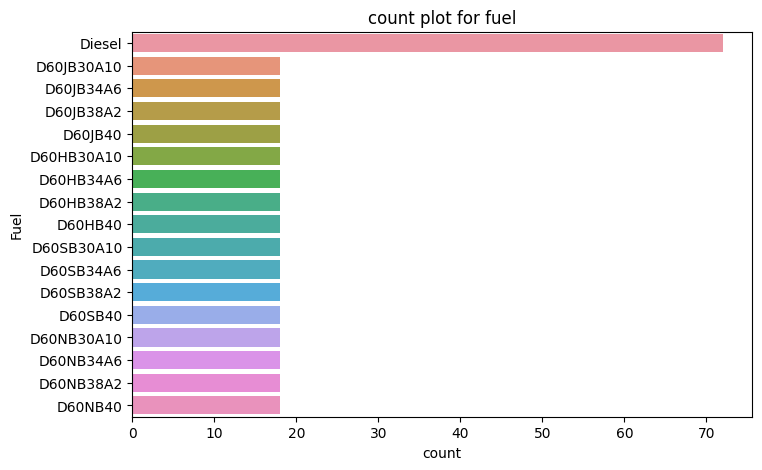

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(y=df.Fuel,data=df)
plt.title('count plot for fuel')
plt.show()

<font color=blue>Inferences:
1. Diesel 70 no. exeperiment
2. other fuel have around 18 exepriment for each

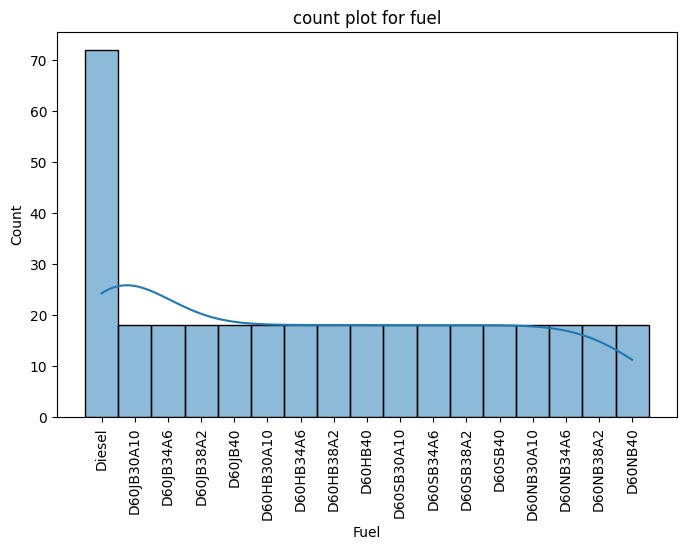

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(x=df.Fuel,data=df,kde=True,bins=10)
plt.title('count plot for fuel')
plt.xticks(rotation=90)
plt.show()

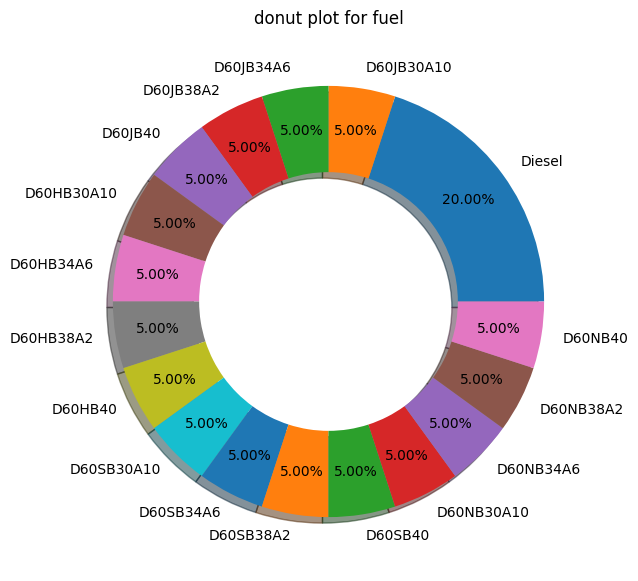

In [ ]:
plt.figure(figsize=(7,7))
plt.pie(df.Fuel.value_counts(),labels=df.Fuel.unique(),autopct='%0.2f%%',pctdistance=0.8,shadow=True,
        wedgeprops={'width':0.4})
plt.title('donut plot for fuel')
plt.show()

In [ ]:
df.IOP.value_counts()

200.0    120
205.0    120
210.0    120
Name: IOP, dtype: int64

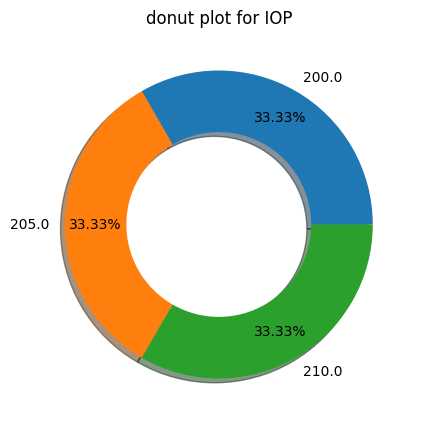

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(df.IOP.value_counts(),labels=df.IOP.unique(),autopct='%0.2f%%',pctdistance=0.8,shadow=True,
        wedgeprops={'width':0.4})
plt.title('donut plot for IOP')
plt.show()

<font color=blue>Inferences:
1. IOP for all the values are equally distributes

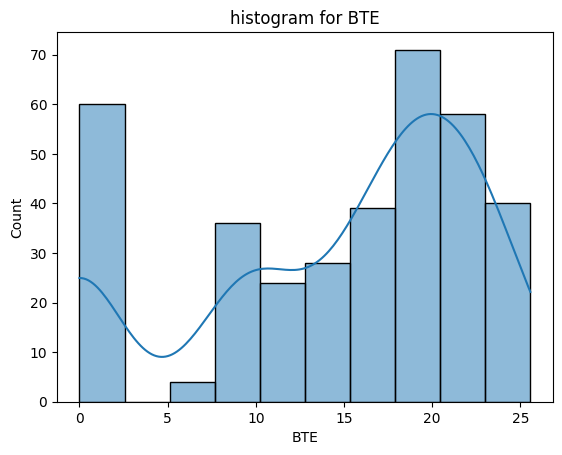

In [ ]:
sns.histplot(x=df.BTE,data=df,bins=10,kde=True)
plt.title('histogram for BTE')
plt.show()

<font color=blue>Inferences:
1. the target(BTE) column is Negativly schewed where mean, median and mode are not equal

In [ ]:
col=df.columns
col

Index(['Fuel', 'IOP', 'Load', 'BP', 'BSFC', 'BTE', 'NOX', 'CO', 'CO2', 'HC',
       'SMOKE', 'EGT'],
      dtype='object')

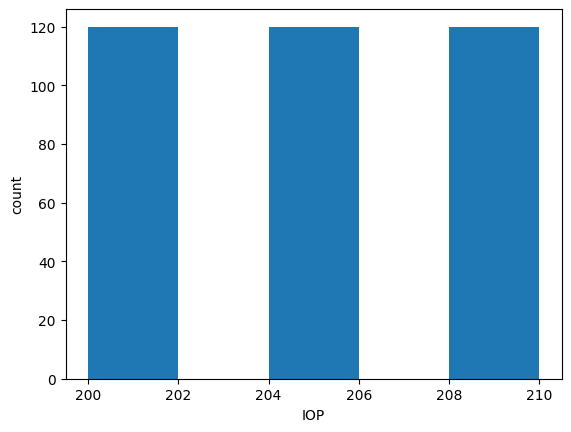

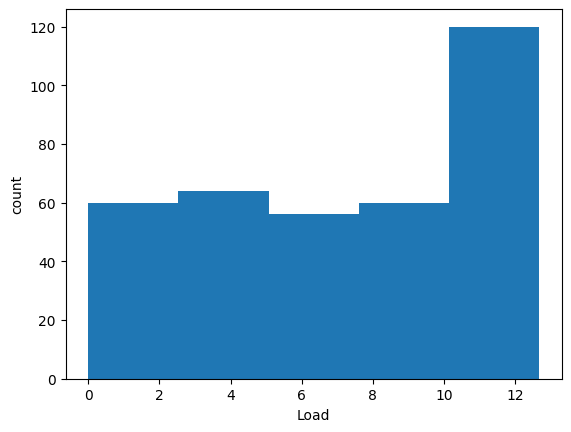

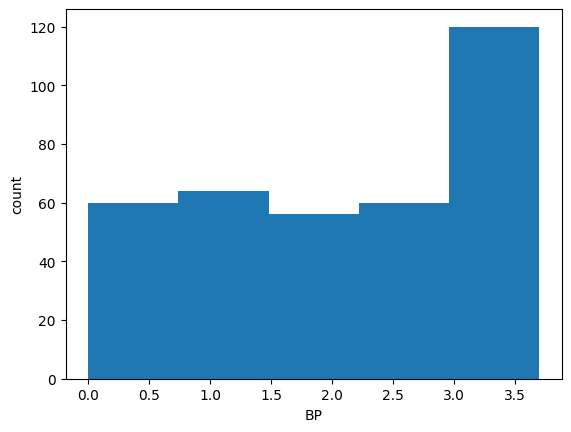

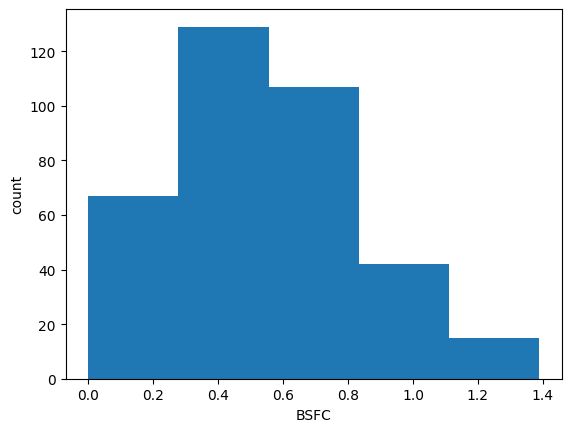

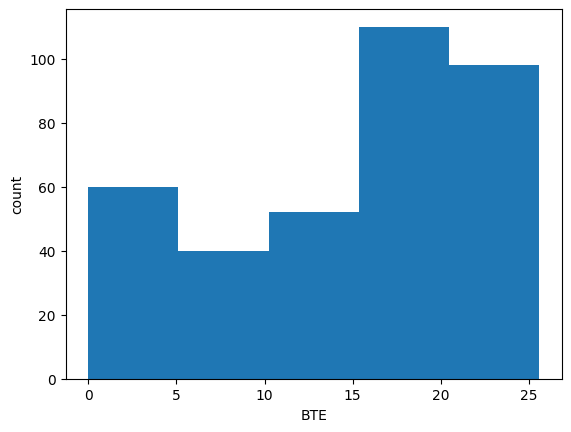

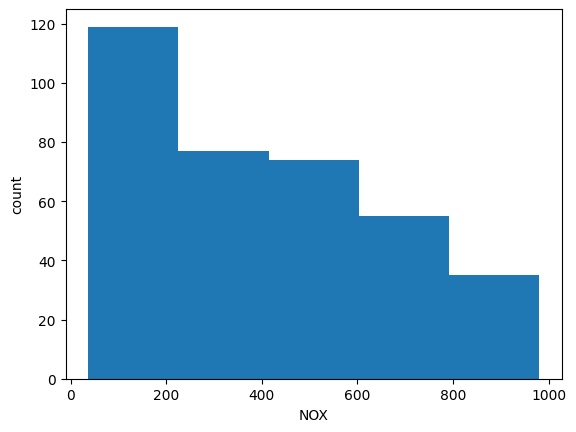

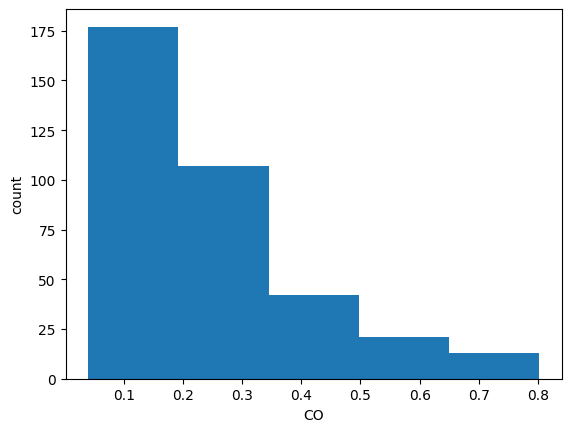

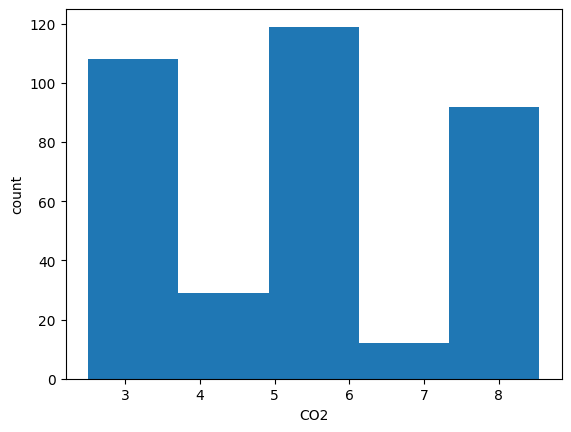

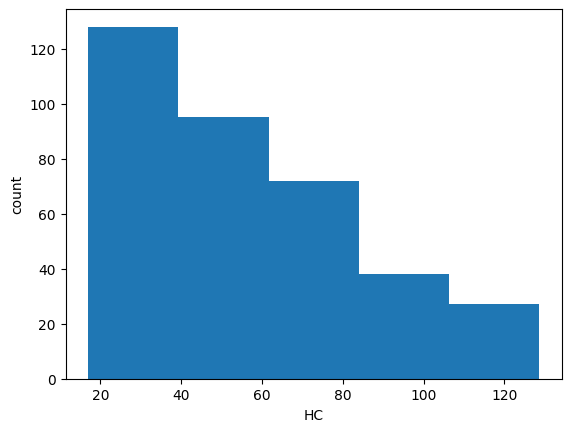

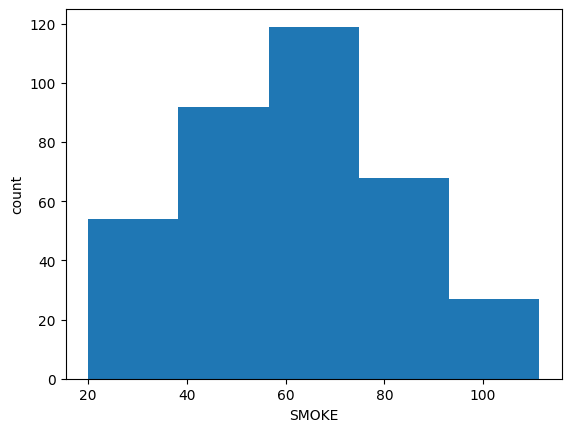

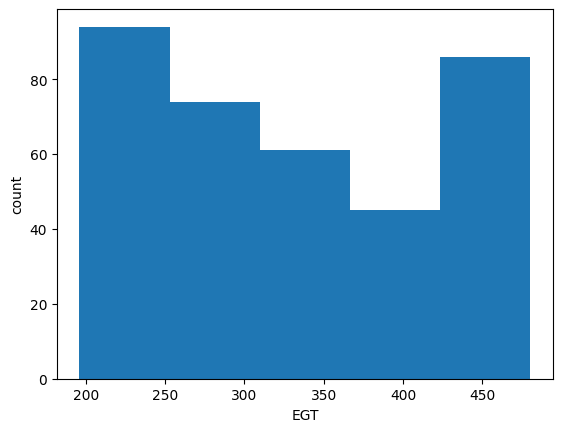

In [ ]:
for col_name in col:
  if(df[col_name].dtype=='int64' or df[col_name].dtype=='float64'):
    plt.hist(df[col_name],bins=5)
    plt.xlabel(col_name)
    plt.ylabel('count')
    plt.show()

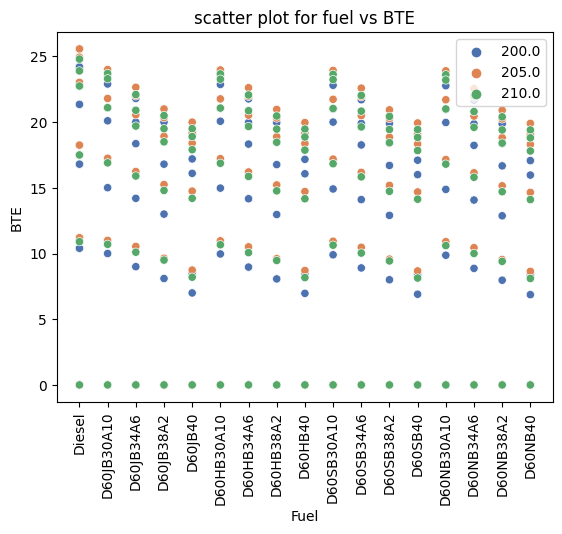

In [ ]:
sns.scatterplot(data=df,x=df.Fuel,y=df.BTE,hue=df.IOP,palette='deep')
plt.xticks(rotation=90)
plt.title('scatter plot for fuel vs BTE' )
plt.legend(loc='best')
plt.show()

<font color=blue>Inferences:
1. for all the fuel where IOP of 205 is giving more BTE

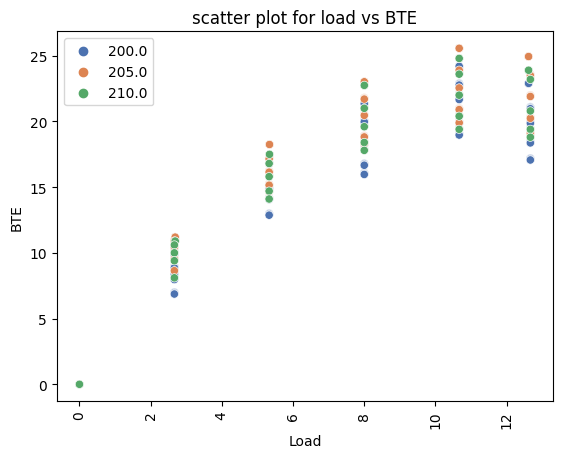

In [ ]:
sns.scatterplot(data=df,x=df.Load,y=df.BTE,hue=df.IOP,palette='deep')
plt.xticks(rotation=90)
plt.title('scatter plot for load vs BTE' )
plt.legend(loc='best')
plt.show()

<font color=blue>Inferences:
1. for the load between 10 - 11 we observe max BTE with IOP of 205

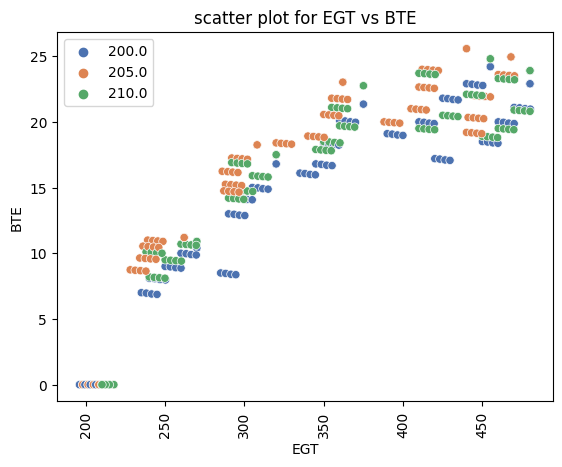

In [ ]:
sns.scatterplot(data=df,x=df.EGT,y=df.BTE,hue=df.IOP,palette='deep')
plt.xticks(rotation=90)
plt.title('scatter plot for EGT vs BTE' )
plt.legend(loc='best')
plt.show()

<font color=blue>Inferences:
1. if the exhaust gas temp is less for all the value of IOP BTE is less
2. maximum value of BTE can be obtained when the EGT range between 400-450 for the IOP of 205

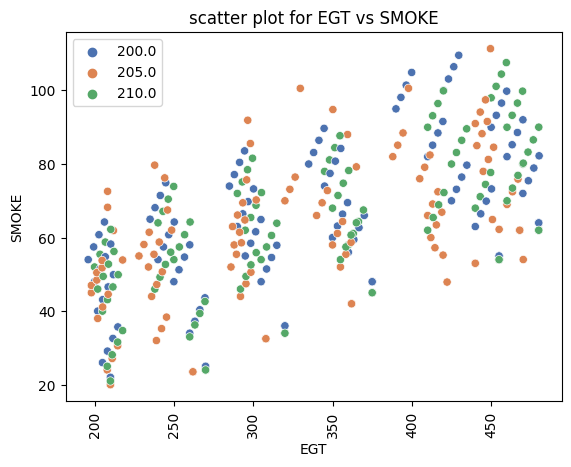

In [ ]:
sns.scatterplot(data=df,x=df.EGT,y=df.SMOKE,hue=df.IOP,palette='deep')
plt.xticks(rotation=90)
plt.title('scatter plot for EGT vs SMOKE' )
plt.legend(loc='best')
plt.show()

<font color=blue>Inferences:
1. it is seen from the graph that the production of smoke is more when the EGT inc for all the value of IOP

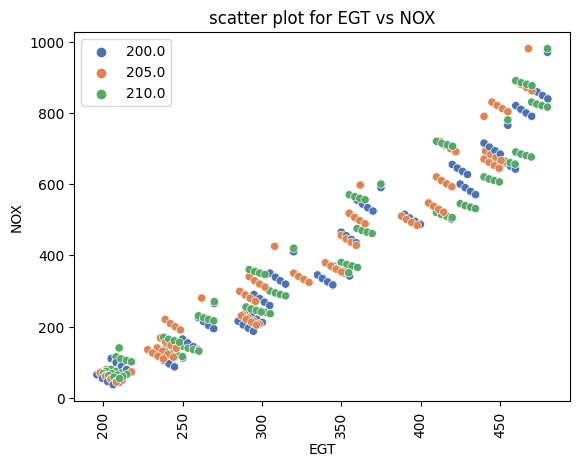

In [ ]:
sns.scatterplot(data=df,x=df.EGT,y=df.NOX,hue=df.IOP,palette='deep')
plt.xticks(rotation=90)
plt.title('scatter plot for EGT vs NOX' )
plt.legend(loc='best')
plt.show()

<font color=blue>Inferences:
1. the production of NOx is more with inc in EGT for all the value of IOP
2. the production of NOx will be alomost same for all the value of IOP when the EGT crosses 450

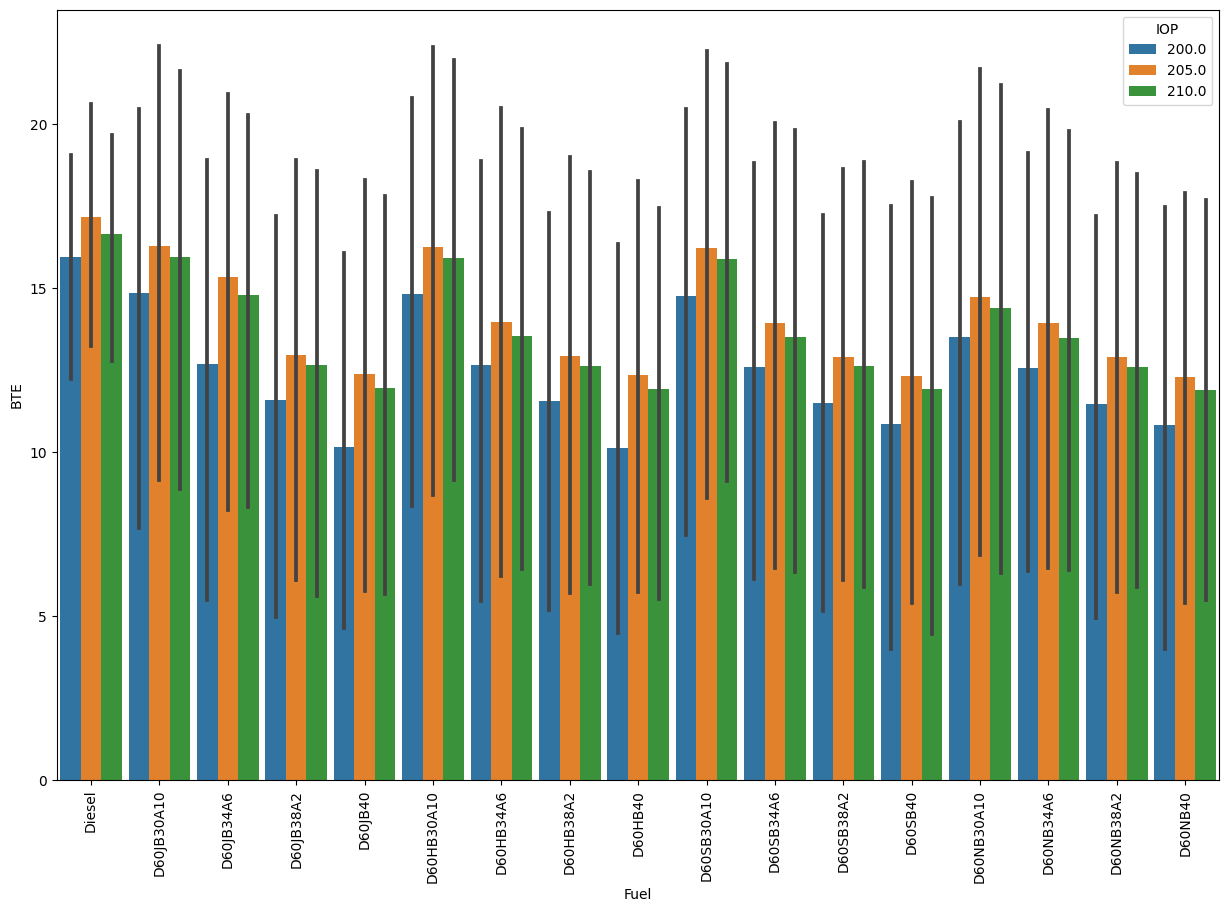

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data=df,x=df.Fuel,y=df.BTE,hue=df.IOP,width=0.9)
plt.xticks(rotation=90)
plt.show()

<font color=blue>Inferences:
1. BTE for diesel is max for all IOP values
2. D60JB30A10, D60HB30A10, D60SB30A10 and D60NB30A10 these are the propotion values with the diesel for all the value of IOP is giving best result but for the IOP value of 205 is giving max BTE.

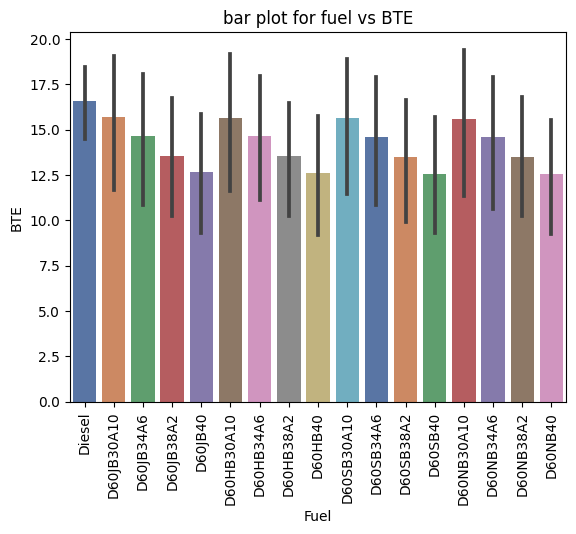

In [ ]:
sns.barplot(data=df,x=df.Fuel,y=df.BTE,palette='deep')
plt.xticks(rotation=90)
plt.title('bar plot for fuel vs BTE' )
plt.show()

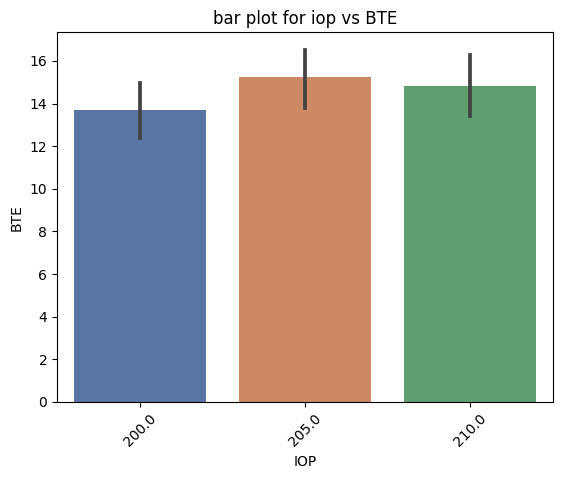

In [ ]:
sns.barplot(data=df,x=df.IOP,y=df.BTE,palette='deep')
plt.xticks(rotation=45)
plt.title('bar plot for iop vs BTE' )
plt.show()

<font color = blue>Inferences:
1. Overall the IOP value of 205 is giving best BTE

In [ ]:
df.head()

Fuel    IOP    Load    BP      BSFC    BTE    NOX    CO   CO2    HC  \
1  Diesel  200.0   0.000  0.00  0.000000   0.00  138.0  0.05  2.70  19.0   
2  Diesel  200.0   2.667  0.74  0.845865  10.40  265.0  0.06  3.32  20.0   
3  Diesel  200.0   5.330  1.48  0.481180  16.80  410.0  0.06  4.92  24.0   
4  Diesel  200.0   8.003  2.22  0.361156  21.35  590.0  0.07  5.80  26.0   
5  Diesel  200.0  10.670  2.96  0.336222  24.20  765.0  0.17  7.60  32.0   

   SMOKE    EGT  
1   22.0  210.0  
2   25.0  270.0  
3   36.0  320.0  
4   48.0  375.0  
5   55.0  455.0

<font color=red><font size=5>Detecting the outliers

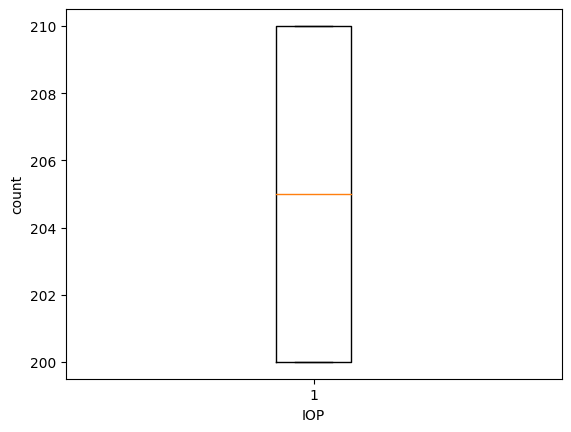

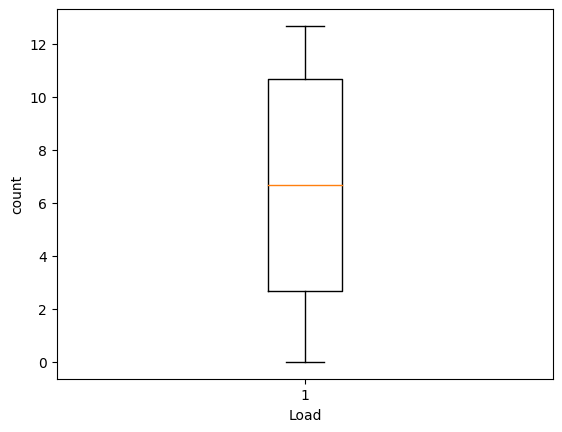

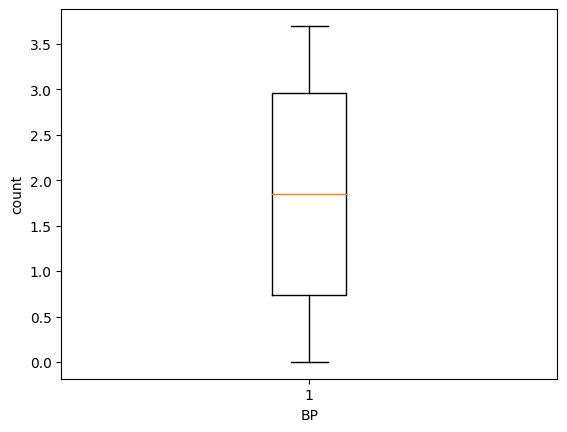

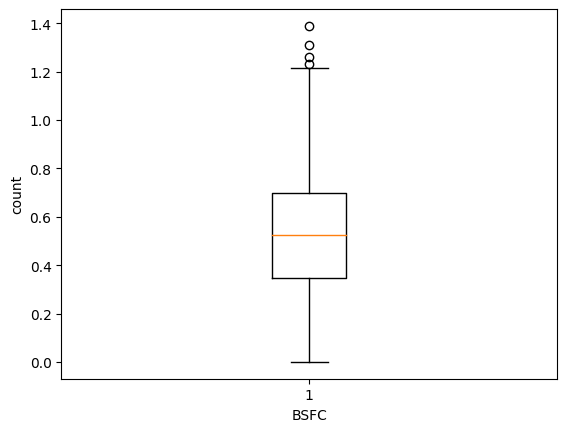

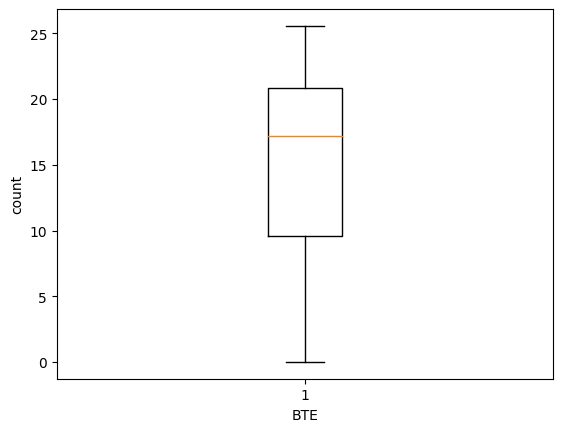

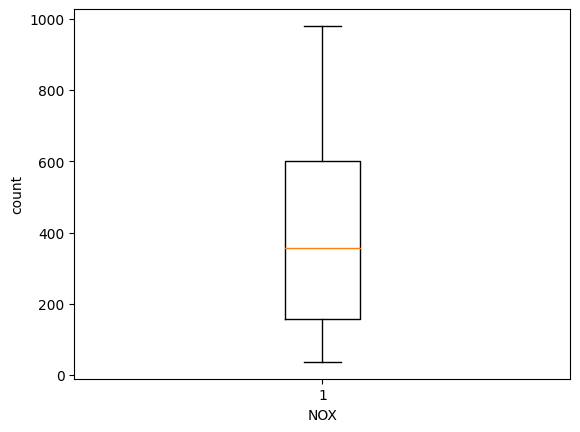

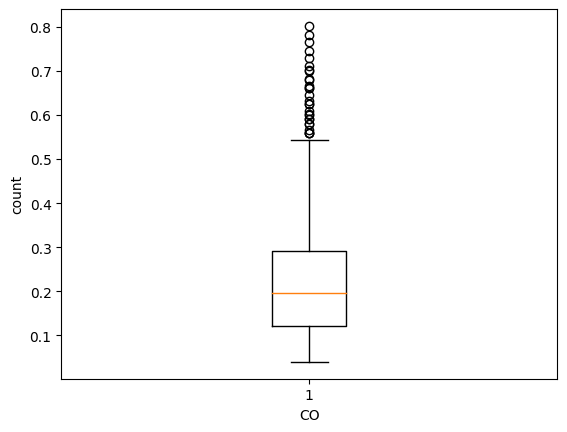

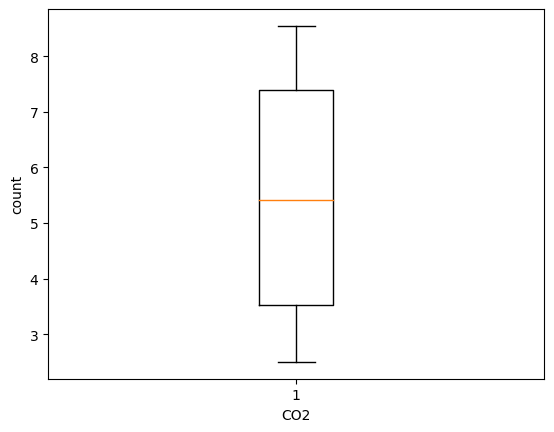

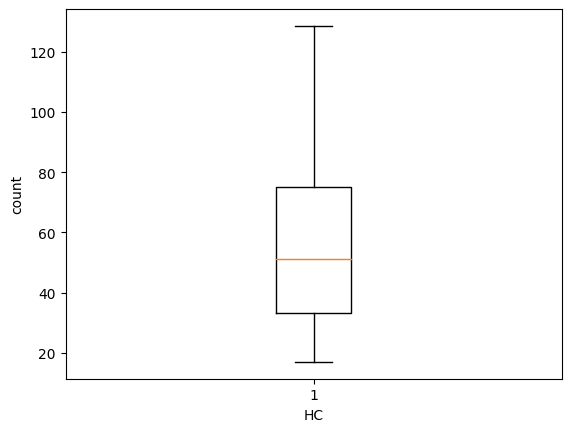

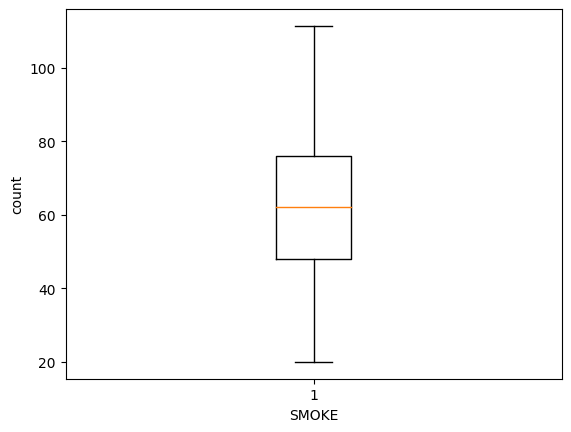

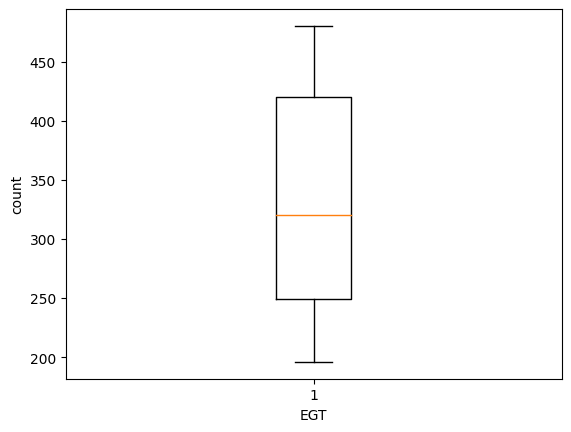

In [ ]:
for col_name in col:
  if(df[col_name].dtype=='int64' or df[col_name].dtype=='float64'):
    plt.boxplot(df[col_name])
    plt.xlabel(col_name)
    plt.ylabel('count')
    plt.show()

<font color = blue>Inferences:
1. Co and BSFC columns have outliers

In [ ]:
df.corr()

IOP      Load        BP      BSFC       BTE       NOX        CO  \
IOP    1.000000  0.008320  0.007938 -0.003581  0.057479  0.026539 -0.024246   
Load   0.008320  1.000000  0.999064  0.095805  0.914151  0.935711  0.687026   
BP     0.007938  0.999064  1.000000  0.089115  0.902003  0.939528  0.701784   
BSFC  -0.003581  0.095805  0.089115  1.000000  0.254287 -0.039938  0.114615   
BTE    0.057479  0.914151  0.902003  0.254287  1.000000  0.873651  0.400161   
NOX    0.026539  0.935711  0.939528 -0.039938  0.873651  1.000000  0.505764   
CO    -0.024246  0.687026  0.701784  0.114615  0.400161  0.505764  1.000000   
CO2   -0.190092  0.922566  0.921648  0.027125  0.832741  0.869285  0.626806   
HC    -0.049700  0.655283  0.663250  0.177092  0.404070  0.437289  0.938310   
SMOKE -0.034805  0.663807  0.664946  0.230984  0.477505  0.424098  0.855134   
EGT    0.015240  0.986266  0.986021  0.057470  0.902254  0.963029  0.646012   

            CO2        HC     SMOKE       EGT  
IOP   -0.190092 -0.049700 -0.034805  0.015240  
Load   0.922566  0.655283  0.663807  0.986266  
BP     0.921648  0.663250  0.664946  0.986021  
BSFC   0.027125  0.177092  0.230984  0.057470  
BTE    0.832741  0.404070  0.477505  0.902254  
NOX    0.869285  0.437289  0.424098  0.963029  
CO     0.626806  0.938310  0.855134  0.646012  
CO2    1.000000  0.586379  0.607006  0.906954  
HC     0.586379  1.000000  0.880364  0.600366  
SMOKE  0.607006  0.880364  1.000000  0.601545  
EGT    0.906954  0.600366  0.601545  1.000000

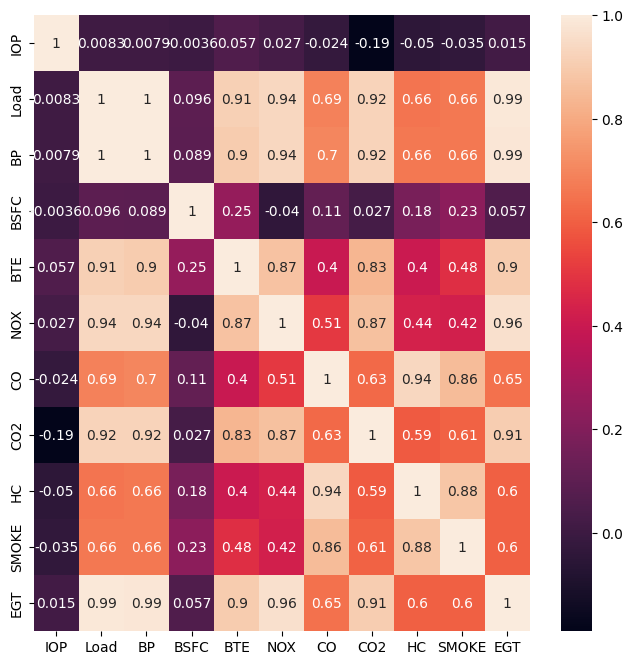

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

<font color = blue>Inferences:
1. Load, BP, NOx, CO2 and EGT columns are positively and highly corelated to target column
2. CO< HC, and Smoke are positevly corelated to target column but doesnt give much effect on that

<Figure size 1000x1000 with 0 Axes>

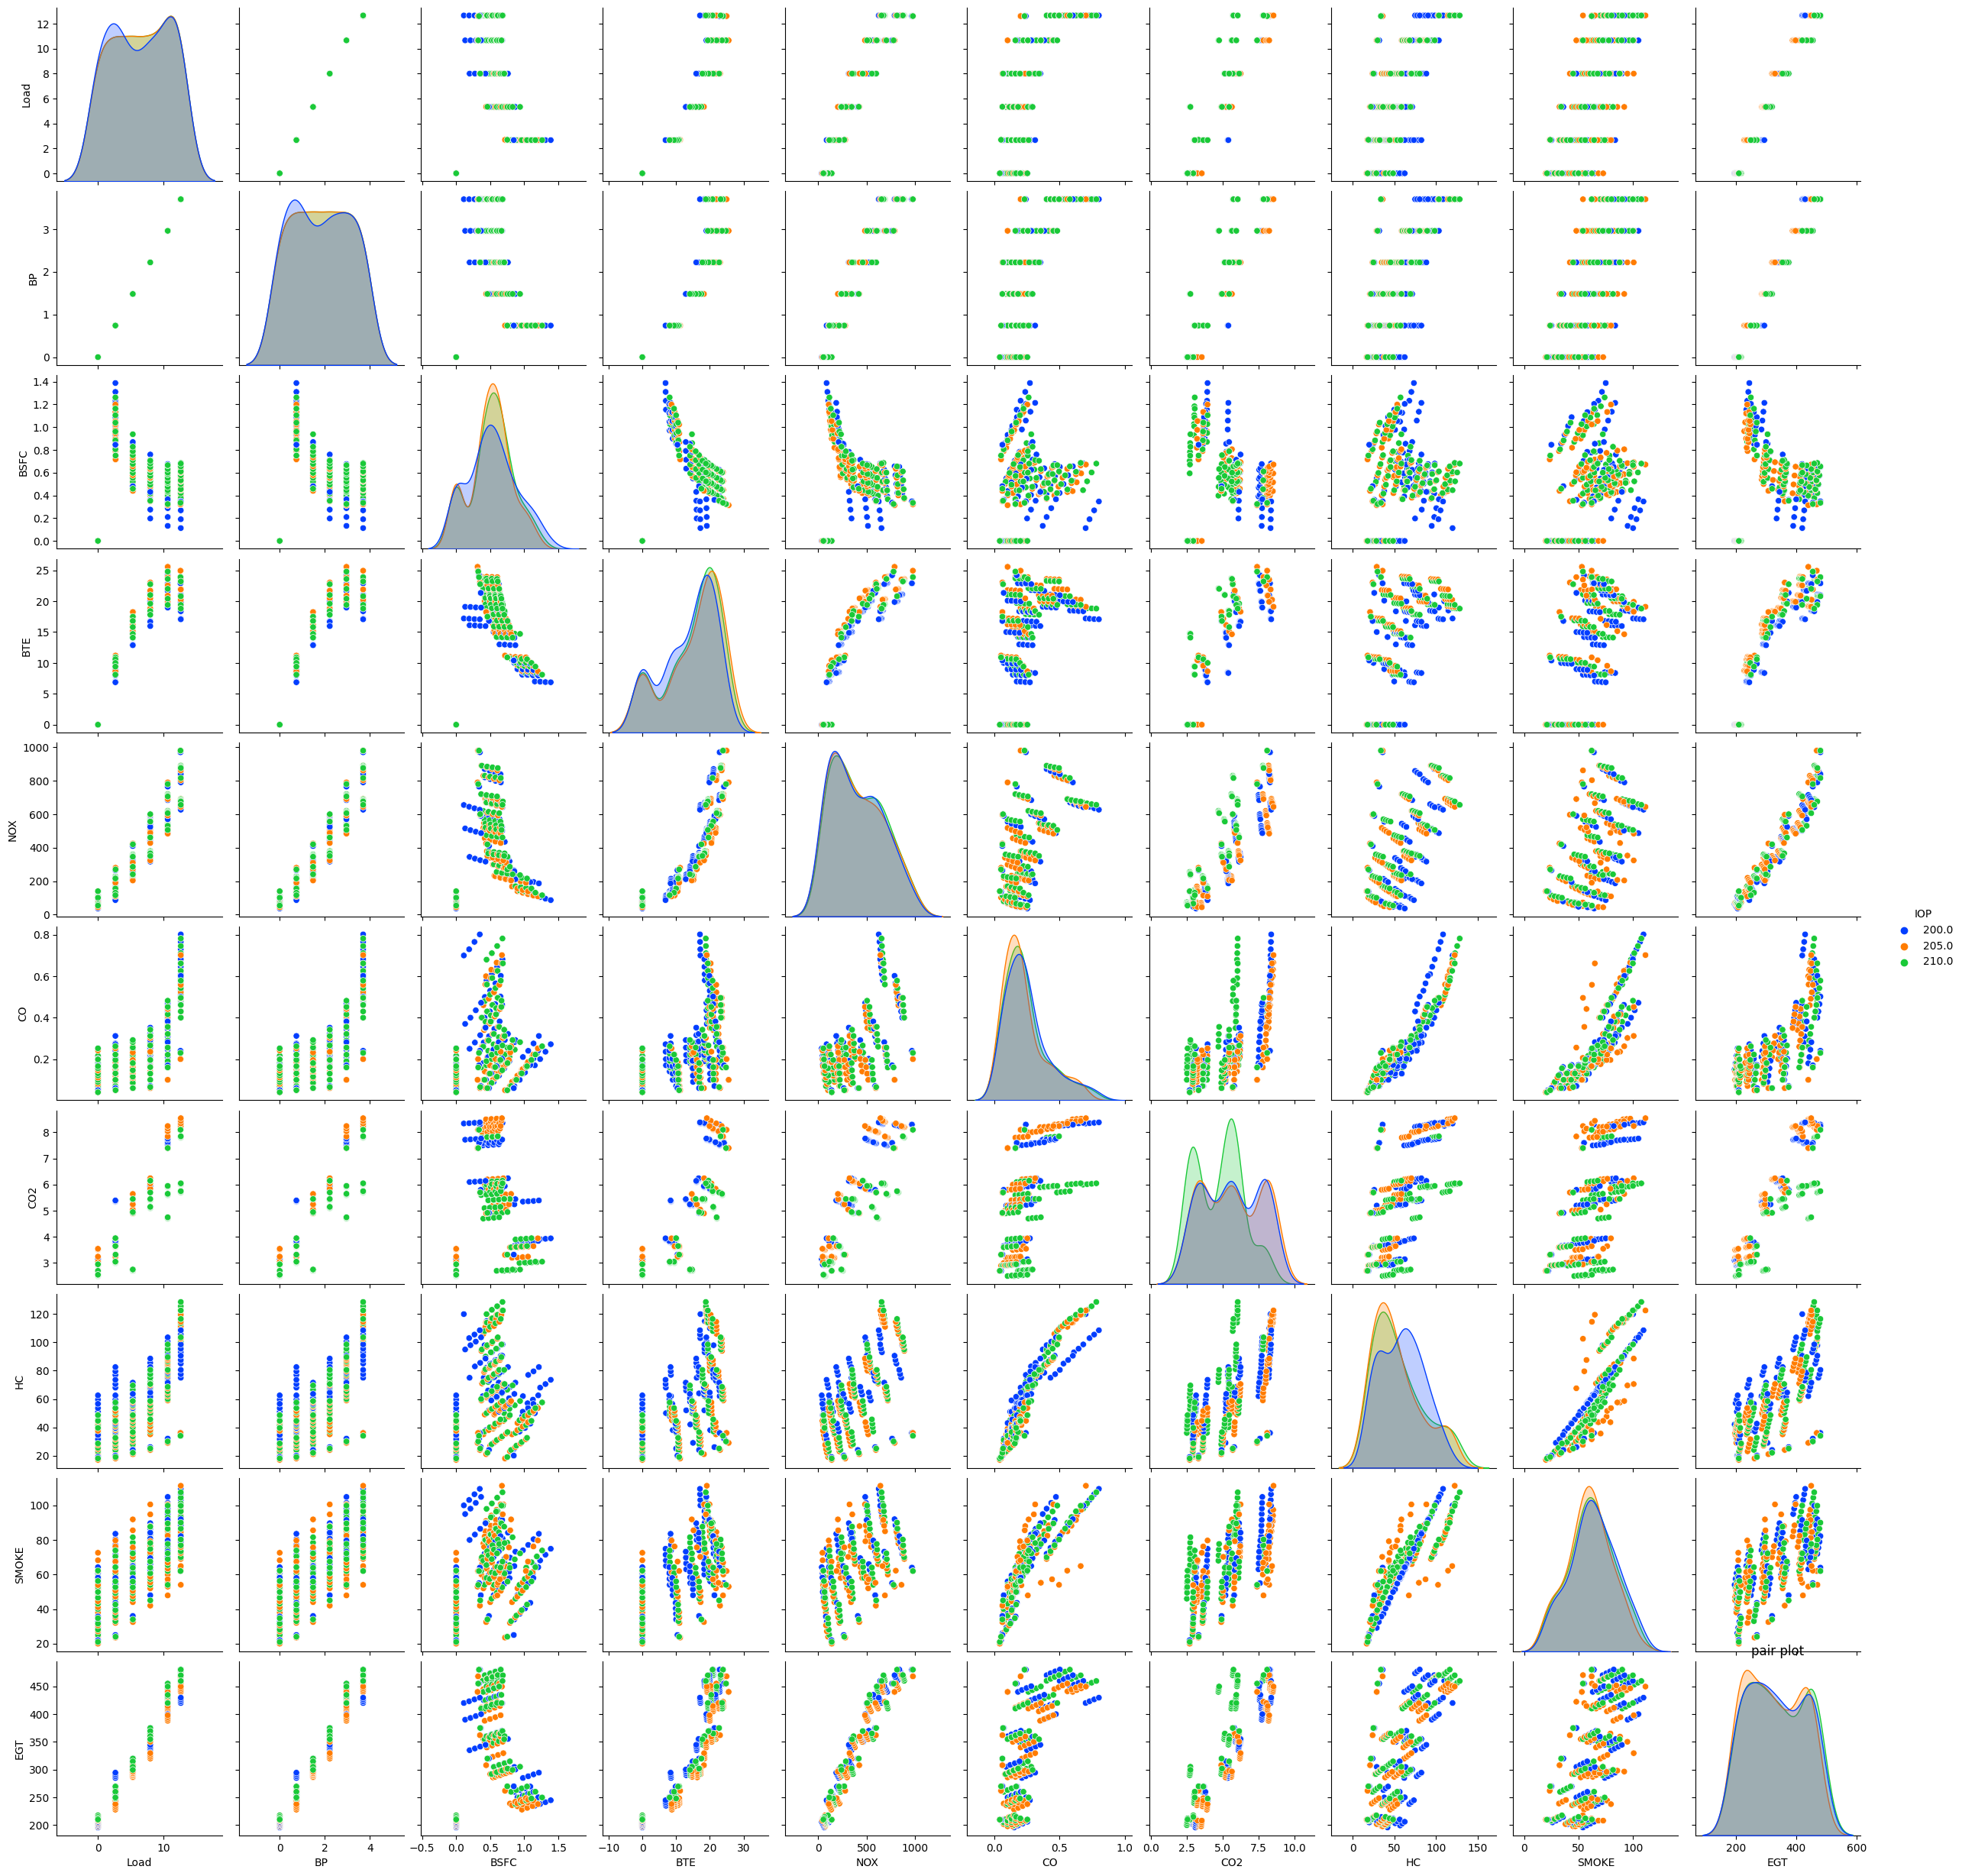

In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(df,hue='IOP',palette='bright')
plt.title('pair plot')
plt.show()

<font color = red><font size=4>Removing the outliers by using IQR method


In [ ]:
q1=np.quantile(df.CO,0.25)
q3=np.quantile(df.CO,0.75)
iqr=q3-q1
upper = q3+1.5*iqr
lower = q1-1.5*iqr
df = df[(df["CO"] < upper) & (df["CO"] > lower)]

In [ ]:
q1=np.quantile(df.BSFC,0.25)
q3=np.quantile(df.BSFC,0.75)
iqr=q3-q1
upper = q3+1.5*iqr
lower = q1-1.5*iqr
df = df[(df["BSFC"] < upper) & (df["BSFC"] > lower)]

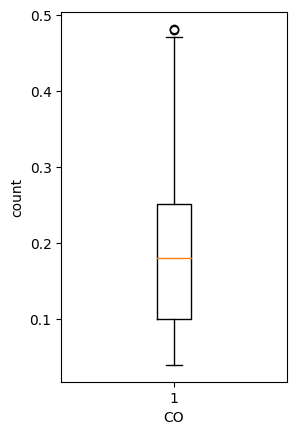

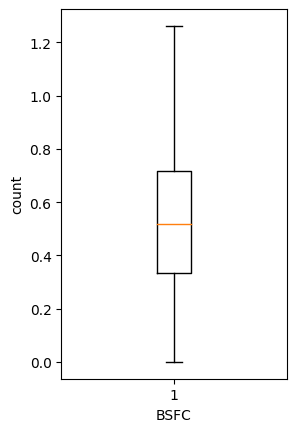

In [ ]:
plt.subplot(1,2,1)
plt.boxplot(df.CO)
plt.xlabel('CO')
plt.ylabel('count')
plt.show()

plt.subplot(1,2,2)
plt.boxplot(df.BSFC)
plt.xlabel('BSFC')
plt.ylabel('count')
plt.show()

In [ ]:
# check for the shape of the data after removing the outliers
df.shape

(330, 12)

<font color = red> Visualizing and checking for the duplicated values

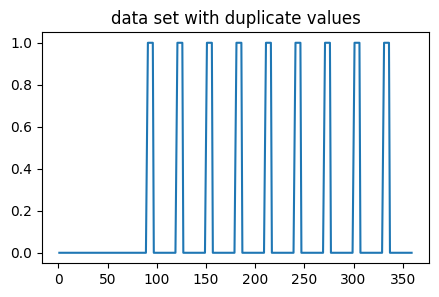

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(df.duplicated())
plt.title('data set with duplicate values')
plt.show()

In [ ]:
df2 = df.drop_duplicates()

In [ ]:
df2.head()


Fuel    IOP    Load    BP      BSFC    BTE    NOX    CO   CO2    HC  \
1  Diesel  200.0   0.000  0.00  0.000000   0.00  138.0  0.05  2.70  19.0   
2  Diesel  200.0   2.667  0.74  0.845865  10.40  265.0  0.06  3.32  20.0   
3  Diesel  200.0   5.330  1.48  0.481180  16.80  410.0  0.06  4.92  24.0   
4  Diesel  200.0   8.003  2.22  0.361156  21.35  590.0  0.07  5.80  26.0   
5  Diesel  200.0  10.670  2.96  0.336222  24.20  765.0  0.17  7.60  32.0   

   SMOKE    EGT  
1   22.0  210.0  
2   25.0  270.0  
3   36.0  320.0  
4   48.0  375.0  
5   55.0  455.0

In [ ]:
df.duplicated().value_counts()

False    276
True      54
dtype: int64

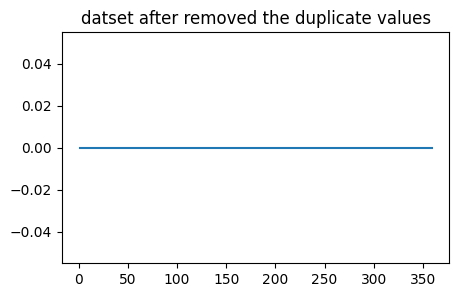

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(df2.duplicated())
plt.title('datset after removed the duplicate values')
plt.show()

In [ ]:
df2.shape

(276, 12)

<font color = blue>Inferences:
1. After removing the outlier and duplicated values the new shape of the dataset is 276 rows and 12 column

<font color=red><font size=4>Encoding the fuel column

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df2.Fuel=le.fit_transform(df2.Fuel)

In [ ]:
df2.head()

Fuel    IOP    Load    BP      BSFC    BTE    NOX    CO   CO2    HC  SMOKE  \
1    16  200.0   0.000  0.00  0.000000   0.00  138.0  0.05  2.70  19.0   22.0   
2    16  200.0   2.667  0.74  0.845865  10.40  265.0  0.06  3.32  20.0   25.0   
3    16  200.0   5.330  1.48  0.481180  16.80  410.0  0.06  4.92  24.0   36.0   
4    16  200.0   8.003  2.22  0.361156  21.35  590.0  0.07  5.80  26.0   48.0   
5    16  200.0  10.670  2.96  0.336222  24.20  765.0  0.17  7.60  32.0   55.0   

     EGT  
1  210.0  
2  270.0  
3  320.0  
4  375.0  
5  455.0

# <font color=green>Feauture selection

<font color=red><font size=4>Checking for the multicolinearity of the columns by using varance inflation factor

In [ ]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):

    X = df2[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [ ]:

# features to consider removing
considered_features = ['Fuel','IOP'	,'Load',	'BP',	'BSFC'	,'NOX',	'CO',	'CO2',	'HC'	,'SMOKE',	'EGT']


# compute vif
compute_vif(considered_features).sort_values('VIF', ascending=True)

Variable          VIF
0      Fuel     1.188041
4      BSFC     1.295965
1       IOP     1.582631
9     SMOKE     5.851227
7       CO2     9.065595
8        HC    12.372534
6        CO    17.555401
5       NOX    77.636881
10      EGT   106.395658
2      Load  2851.929536
3        BP  3003.464890

In [ ]:
df2.drop(columns=['BP'],inplace=True)

In [ ]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):

    X = df2[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [ ]:
# features to consider removing
considered_features = ['Fuel','IOP'	,'Load',	'BSFC'	,'NOX',	'CO',	'CO2',	'HC'	,'SMOKE',	'EGT']


# compute vif
compute_vif(considered_features).sort_values('VIF', ascending=True)

Variable        VIF
0     Fuel   1.174888
3     BSFC   1.219340
1      IOP   1.554473
8    SMOKE   5.838077
6      CO2   8.900330
5       CO  11.178400
7       HC  12.260824
4      NOX  28.413218
2     Load  64.168132
9      EGT  71.747288

In [ ]:
df2.drop(columns=['EGT'],inplace=True)

In [ ]:
# compute the vif for all given features
def compute_vif(considered_features):

    X = df2[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [ ]:
# features to consider removing
considered_features = ['Fuel','IOP'	,'Load',	'BSFC'	,'NOX',	'CO',	'CO2',	'HC'	,'SMOKE']


# compute vif
compute_vif(considered_features).sort_values('VIF', ascending=True)

Variable        VIF
0     Fuel   1.135549
3     BSFC   1.219338
1      IOP   1.535655
8    SMOKE   5.834079
6      CO2   8.739467
5       CO  10.794259
7       HC  12.234447
4      NOX  19.026617
2     Load  34.256331

In [ ]:
df2.drop(columns=['Load'],inplace=True)

In [ ]:
# compute the vif for all given features
def compute_vif(considered_features):

    X = df2[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [ ]:
considered_features = ['Fuel', 'IOP',	'BSFC','NOX',	'CO',	'CO2',	'HC','SMOKE']


# compute vif
compute_vif(considered_features).sort_values('VIF', ascending=True)

Variable        VIF
2     BSFC   1.086891
0     Fuel   1.134163
1      IOP   1.400081
7    SMOKE   4.524567
3      NOX   5.260752
5      CO2   6.506247
4       CO  10.148568
6       HC  11.521115

In [ ]:
df2.drop(columns=['HC'],inplace=True)

In [ ]:
def compute_vif(considered_features):

    X = df2[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [ ]:
considered_features = ['Fuel', 'IOP',	'BSFC','NOX',	'CO',	'CO2','SMOKE']


# compute vif
compute_vif(considered_features).sort_values('VIF', ascending=True)

Variable       VIF
0     Fuel  1.011974
2     BSFC  1.085908
1      IOP  1.313151
6    SMOKE  3.773873
4       CO  4.072129
3      NOX  5.193208
5      CO2  6.460836

<font color=blue>Inferences:
1. after droping 4 column with multi colinearty 8 feauture will be availble for the model out of that one will be target column

<font color=red><font size=4>Check for the auto corelation

In [ ]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(df2)

array([3.60334029e-02, 4.30677132e-05, 6.65949698e-01, 4.29300922e-01,
       4.80542640e-01, 3.43892353e-01, 1.77935898e-01, 8.66500721e-02])

<font color=blue>Inferences:
1. since the value of durbin watson test is less there is no sign of autocorelation

In [ ]:
df2.head()

Fuel    IOP      BSFC    BTE    NOX    CO   CO2  SMOKE
1    16  200.0  0.000000   0.00  138.0  0.05  2.70   22.0
2    16  200.0  0.845865  10.40  265.0  0.06  3.32   25.0
3    16  200.0  0.481180  16.80  410.0  0.06  4.92   36.0
4    16  200.0  0.361156  21.35  590.0  0.07  5.80   48.0
5    16  200.0  0.336222  24.20  765.0  0.17  7.60   55.0

<font color=green><font size=4>Deviding the dataset in to Indpenent and Target column

In [ ]:
x=df2.drop('BTE',axis=1)
y=df2.loc[:,'BTE']

<font color=red>Scale down the feauture values to standard normal distribution by using standard scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
X=sc.fit_transform(x)

<font color=red>Split the dataset into training and test dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((220, 7), (56, 7), (220,), (56,))

# <font color=green><font size=6>Model selection




# <font color=green>Linaer regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.score(x_train,y_train)

0.9253653324600785

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
lr.score(x_test,y_pred)

1.0

In [ ]:
lr.coef_

array([-0.1325696 ,  0.84535725,  1.88961188,  5.2897039 , -3.22701143,
        2.98569011,  2.45294863])

In [ ]:
lr.intercept_

13.94642429839495

<font color = red>Model evaluation

In [ ]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('*'*160)
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('*'*160)
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

MAE: 1.7196587150546414
****************************************************************************************************************************************************************
MSE: 4.587311186062089
****************************************************************************************************************************************************************
RMSE: 1.3113575847398151


In [ ]:
def get_residuals(model,x,y):
    y_pred = model.predict(x)
    df2_lr = pd.DataFrame()
    df2_lr['actual']=y
    df2_lr['prediction']= y_pred
    df2_lr['residuals'] = abs(df2_lr['actual']-df2_lr['prediction'])
    return df2_lr

In [ ]:
df2_lr= get_residuals(lr,x_test,y_test)
df2_lr.head()

actual  prediction  residuals
108  19.9675   22.599717   2.632217
19    0.0000    1.793336   1.793336
229   0.0000    1.251205   1.251205
67    0.0000    2.372716   2.372716
322  18.8225   18.730705   0.091795

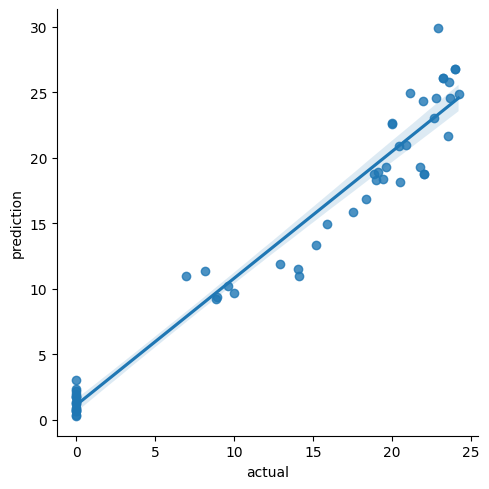

In [ ]:
sns.lmplot(x='actual', y='prediction', data=df2_lr)
diag_line=np.arange(df2_lr['residuals'].min(),df2_lr['residuals'].max())

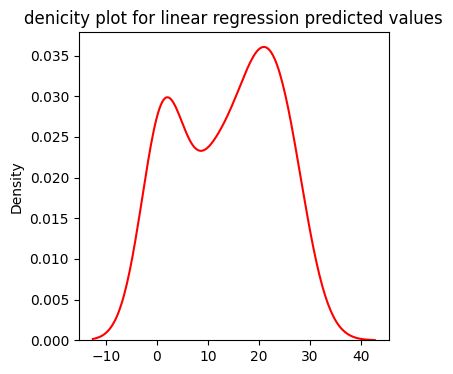

In [ ]:
plt.figure(figsize=(4,4))
sns.distplot(y_pred,color='red',hist=False)
plt.title('denicity plot for linear regression predicted values')
plt.show()

# <font color=green>Lasso Regresion

In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1.0,max_iter=100)

In [ ]:
lasso.fit(x_train,y_train)
y_pred_lasso=lasso.predict(x_test)

In [ ]:
lasso.score(x_train,y_train)

0.8309559610555719

In [ ]:
lasso.score(x_test,y_pred_lasso)

1.0

In [ ]:
def get_residuals(model,x,y):
    y_pred = model.predict(x)
    df2_lasso = pd.DataFrame()
    df2_lasso['actual']=y
    df2_lasso['prediction']= y_pred_lasso
    df2_lasso['residuals'] = abs(df2_lasso['actual']-df2_lasso['prediction'])
    return df2_lasso

In [ ]:
df2_lasso= get_residuals(lr,x_test,y_test)
df2_lasso.head()

actual  prediction  residuals
108  19.9675   25.302876   5.335376
19    0.0000    5.328220   5.328220
229   0.0000    5.143281   5.143281
67    0.0000    5.878267   5.878267
322  18.8225   15.579993   3.242507

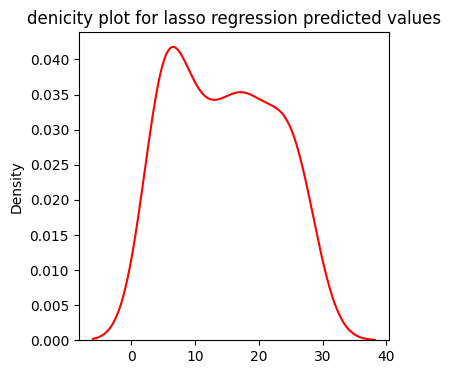

In [ ]:
plt.figure(figsize=(4,4))
sns.distplot(y_pred_lasso,color='red',hist=False)
plt.title('denicity plot for lasso regression predicted values')
plt.show()

<font color=red>Model Evaluation

In [ ]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_lasso))
print('*'*160)
print('MSE:',metrics.mean_squared_error(y_test,y_pred_lasso))
print('*'*160)
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test,y_pred_lasso)))

MAE: 3.307892512907458
****************************************************************************************************************************************************************
MSE: 14.091602332822328
****************************************************************************************************************************************************************
RMSE: 1.8187612578091326


# <font color=green>Decission tree regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from graphviz import Source

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred_dt=dt.predict(x_test)

In [ ]:
dt.score(x_train,y_train)

1.0

In [ ]:
dt.score(x_test,y_pred_dt)

1.0

<font color = red>Model evaluation for decission Tree

In [ ]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred_dt))
print('*'*160)
print('MSE:',metrics.mean_squared_error(y_test,y_pred_dt))
print('*'*160)
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test,y_pred_dt)))

MAE: 0.4963035714285712
****************************************************************************************************************************************************************
MSE: 0.7271430178571426
****************************************************************************************************************************************************************
RMSE: 0.7044881627313344


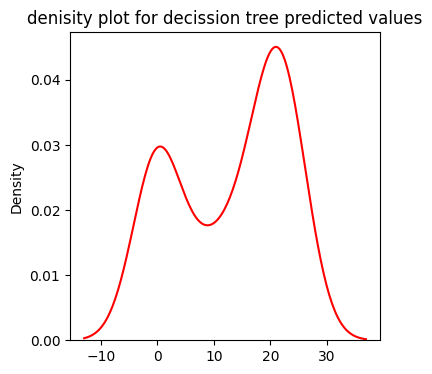

In [ ]:
plt.figure(figsize=(4,4))
sns.distplot(y_pred_dt,color='red',hist=False)
plt.title('denisity plot for decission tree predicted values')
plt.show()

In [ ]:
def get_residuals(model,x,y):
    y_pred = model.predict(x)
    df2_dt = pd.DataFrame()
    df2_dt['actual']=y
    df2_dt['prediction']= y_pred_dt
    df2_dt['residuals'] = abs(df2_dt['actual']-df2_dt['prediction'])
    return df2_dt

In [ ]:
df2_dt= get_residuals(dt,x_test,y_test)
df2_dt.head()

actual  prediction  residuals
108  19.9675     21.8000     1.8325
19    0.0000      0.0000     0.0000
229   0.0000      0.0000     0.0000
67    0.0000      0.0000     0.0000
322  18.8225     17.8025     1.0200

<font color=red>Use of hyper parameter tuning for Decission tree algorithm

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
dt=DecisionTreeRegressor()


In [ ]:
grid = GridSearchCV(estimator=dt, param_grid=parameters, cv=5, verbose=True)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 50400 candidates, totalling 252000 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']},
             verbose=True)

In [ ]:
final_model = grid.best_estimator_
final_model

DecisionTreeRegressor(max_depth=5, max_features='auto',
                      min_weight_fraction_leaf=0.1)

In [ ]:
grid.best_score_

0.9643024922976515

In [ ]:
grid_model_dt=DecisionTreeRegressor(max_depth=5, max_features='auto',
                      min_weight_fraction_leaf=0.1)

In [ ]:
grid_model_dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto',
                      min_weight_fraction_leaf=0.1)

In [ ]:
y_pred_grid_dt=grid_model_dt.predict(x_test)
y_pred_grid_dt

array([22.71114286,  0.        ,  0.        ,  0.        , 17.72597826,
        0.        , 22.71114286,  0.        , 22.71114286, 20.25335526,
        0.        , 20.25335526,  0.        ,  8.85409091, 20.25335526,
        0.        ,  0.        ,  8.85409091, 22.71114286,  0.        ,
       22.71114286, 17.72597826, 16.37931818,  8.85409091, 22.71114286,
       22.71114286, 22.71114286, 20.25335526,  0.        , 22.71114286,
       22.71114286,  0.        ,  8.85409091, 20.25335526, 22.71114286,
        0.        , 22.71114286, 17.72597826, 17.72597826,  0.        ,
       10.70293478, 22.71114286,  0.        ,  0.        , 22.71114286,
       13.55793478, 22.71114286, 22.71114286, 13.55793478,  8.85409091,
       22.71114286, 20.25335526, 22.71114286, 13.55793478, 10.70293478,
        0.        ])

In [ ]:
grid_model_dt.score(x_train,y_train)

0.9757502229977288

In [ ]:
grid_model_dt.score(x_test,y_pred_grid_dt)

1.0

In [ ]:
def get_residuals(model,x,y):
    y_pred = model.predict(x)
    df2_tuned_dt = pd.DataFrame()
    df2_tuned_dt['actual_dt']=y
    df2_tuned_dt['prediction_dt']= y_pred_grid_dt
    df2_tuned_dt['residuals_grid_dt'] = abs(df2_tuned_dt['actual_dt']-df2_tuned_dt['prediction_dt'])
    return df2_tuned_dt

In [ ]:
df2_tuned_dt= get_residuals(grid_model_dt,x_test,y_test)
df2_tuned_dt.head()

actual_dt  prediction_dt  residuals_grid_dt
108    19.9675      22.711143           2.743643
19      0.0000       0.000000           0.000000
229     0.0000       0.000000           0.000000
67      0.0000       0.000000           0.000000
322    18.8225      17.725978           1.096522

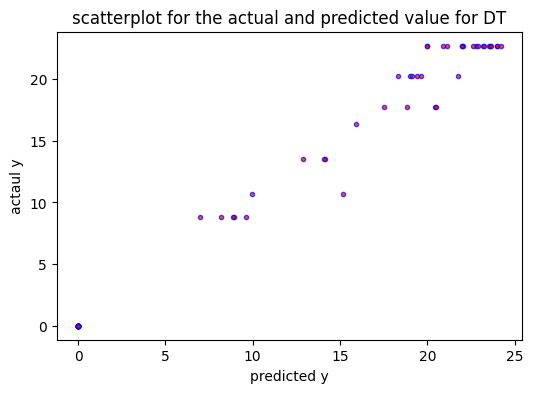

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(y_test,y_pred_grid_dt,c='red',marker='.',edgecolors='blue',alpha=0.7)
plt.xlabel('predicted y')
plt.ylabel('actaul y')
plt.title('scatterplot for the actual and predicted value for DT')
plt.show()

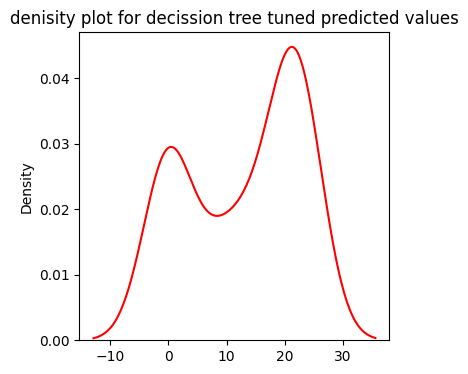

In [ ]:
plt.figure(figsize=(4,4))
sns.distplot(y_pred_grid_dt,color='red',bins=5,hist=False)
plt.title('denisity plot for decission tree tuned predicted values')
plt.show()

<font color = red>Model evaluation for tuned decission tree

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_grid_dt))
print('*'*160)
print('MSE:', metrics.mean_squared_error(y_test, y_pred_grid_dt))
print('*'*160)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_grid_dt)))

MAE: 0.7858298447629524
****************************************************************************************************************************************************************
MSE: 1.4896805417696086
****************************************************************************************************************************************************************
RMSE: 1.2205246993689265


<font color = red>decission tree Visualization

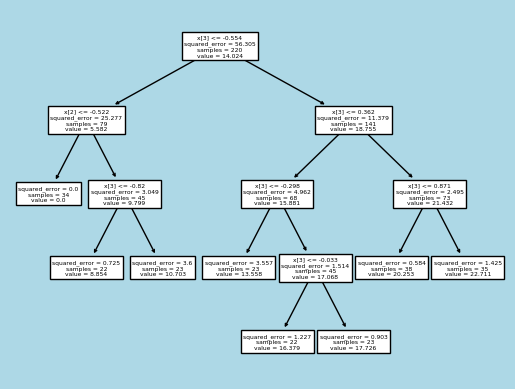

In [ ]:
from sklearn import tree
plt.figure(facecolor='lightblue')
tree.plot_tree(grid_model_dt)
plt.show()

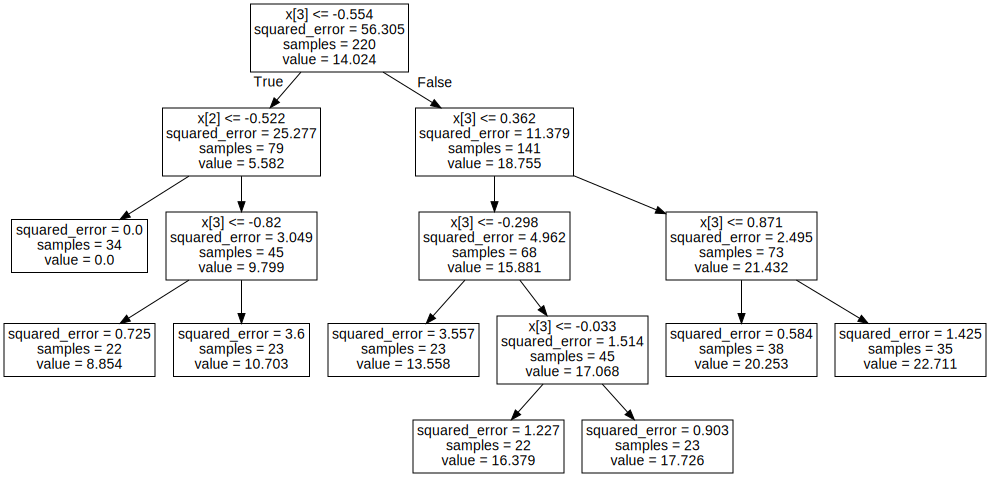

In [ ]:
import graphviz
dot_data = tree.export_graphviz(grid_model_dt, out_file=None)
graph = graphviz.Source(dot_data)
graph

# <font color =green>Random forest algorithm





In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [ ]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred_rf=rf.predict(x_test)
y_pred_rf

array([21.312825,  0.      ,  0.      ,  0.095   , 17.858625,  0.      ,
       22.2291  ,  0.      , 22.96178 , 19.51555 ,  0.      , 19.29965 ,
        0.      ,  8.84535 , 19.660975,  0.      ,  0.      ,  9.38075 ,
       23.56036 ,  0.      , 23.062575, 18.3723  , 16.022225,  7.73695 ,
       23.99435 , 21.145   , 21.919425, 19.603475,  0.      , 21.3788  ,
       21.8291  ,  0.      ,  8.69465 , 20.9525  , 23.328235,  0.      ,
       23.34523 , 17.7285  , 18.56145 ,  0.      , 10.255225, 23.42481 ,
        0.      ,  0.      , 23.06431 , 13.4198  , 23.400025, 21.482575,
       14.287525,  8.348175, 22.33265 , 19.42555 , 22.425175, 13.663375,
       14.292825,  0.      ])

In [ ]:
rf.score(x_train,y_train)

0.9987804947325176

In [ ]:
rf.score(x_test,y_pred_rf)

1.0

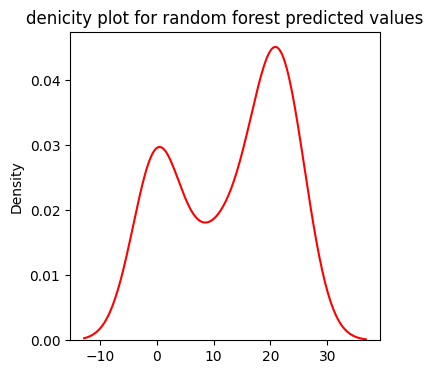

In [ ]:
plt.figure(figsize=(4,4))
sns.distplot(y_pred_rf,color='red',hist=False)
plt.title('denicity plot for random forest predicted values')
plt.show()

<font color = red>Model evaluation for Random forest

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_rf))
print('*'*160)
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rf))
print('*'*160)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

MAE: 0.4252041071428562
****************************************************************************************************************************************************************
MSE: 0.4417397071910702
****************************************************************************************************************************************************************
RMSE: 0.6646350180294973


<font color=red>Use of gridsearch CV for hyper parameter tune the model

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
rf_tuned=RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf_tuned, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [ ]:
grid_search.best_score_

0.9775552587505199

In [ ]:
tuned_rf = RandomForestRegressor(bootstrap= True,max_depth= 100,max_features= 3,
                                    min_samples_leaf= 3,min_samples_split= 10,n_estimators= 100)

In [ ]:
tuned_rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=100, max_features=3, min_samples_leaf=3,
                      min_samples_split=10)

In [ ]:
y_pred_tuned_rf=tuned_rf.predict(x_test)
y_pred_tuned_rf

array([21.15897591,  0.08467083,  0.76064252,  1.92648515, 17.73350567,
        1.14975606, 21.60668713,  1.07416631, 22.60100863, 19.74257304,
        0.        , 19.93763347,  1.14975606,  8.79830919, 19.95004575,
        0.        ,  0.03213333,  9.38355942, 23.19826893,  0.        ,
       22.8097091 , 18.64858882, 16.12482229,  6.17185858, 23.6286823 ,
       21.25172368, 21.71033038, 19.81878827,  0.15672188, 21.38416853,
       21.25491166,  0.76978679,  9.03943533, 20.62574791, 23.58279583,
        0.04173611, 22.94491923, 17.81446934, 18.6853223 ,  0.09331528,
       10.21445793, 23.05874424,  0.        ,  0.        , 22.59965855,
       14.04200552, 22.14672954, 21.37032608, 14.31432041,  8.61438067,
       22.58563905, 19.75392531, 22.16893922, 13.84584936, 14.25877592,
        0.        ])

In [ ]:
tuned_rf.score(x_train,y_train)

0.9934901462208194

In [ ]:
tuned_rf.score(x_test,y_pred_tuned_rf)

1.0

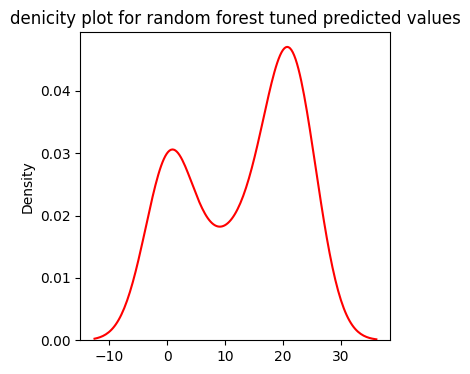

In [ ]:
plt.figure(figsize=(4,4))
sns.distplot(y_pred_tuned_rf,color='red',hist=False)
plt.title('denicity plot for random forest tuned predicted values')
plt.show()

In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


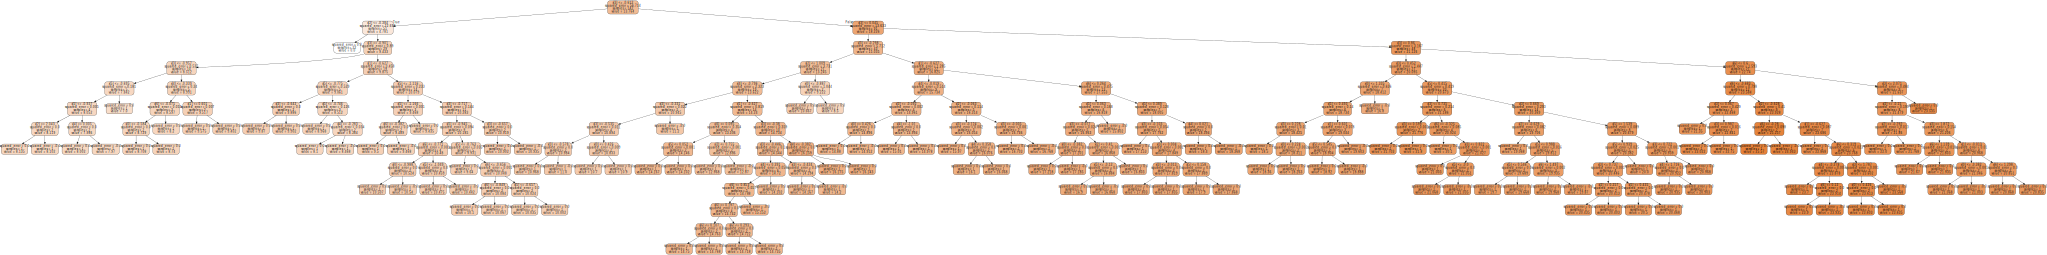

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(rf.estimators_[99],
                           filled=True, impurity=True,
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph



<font color=red> Model evaluation hyper parameter tuned Random forest

In [ ]:
from sklearn import metrics
print('MAE',metrics.mean_absolute_error(y_test,y_pred_tuned_rf))
print('*'*160)
print('MSE',metrics.mean_squared_error(y_test,y_pred_tuned_rf))
print('*'*160)
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,y_pred_tuned_rf)))

MAE 0.6595877302276686
****************************************************************************************************************************************************************
MSE 0.7259217201953643
****************************************************************************************************************************************************************
RMSE 0.8520103991122199


# <font color =green> XG Boost

In [ ]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_pred_xgb=xgb.predict(x_test)
y_pred_xgb

array([ 2.12278843e+01, -9.52739455e-03, -5.02739772e-02,  4.92065866e-03,
        1.79899578e+01, -2.18693893e-02,  2.20015430e+01, -2.79210601e-02,
        2.24086208e+01,  1.87185955e+01, -1.67498179e-02,  1.90833321e+01,
       -7.61886686e-03,  8.71163368e+00,  1.97528286e+01,  2.08151061e-02,
        5.18186018e-03,  9.47133064e+00,  2.36098938e+01, -5.12101862e-04,
        2.29842415e+01,  1.96346321e+01,  1.59865885e+01,  7.19851542e+00,
        2.37722759e+01,  2.08708763e+01,  2.12782097e+01,  1.94661179e+01,
       -5.12340553e-02,  2.08987045e+01,  2.18792362e+01,  1.50367841e-02,
        8.92199135e+00,  2.10772362e+01,  2.29213219e+01,  2.46945838e-03,
        2.35292072e+01,  1.78623676e+01,  1.93003044e+01, -5.52292317e-02,
        9.98321724e+00,  2.36434708e+01,  4.17821892e-02,  1.71558987e-02,
        2.30371761e+01,  1.32531147e+01,  2.35836773e+01,  2.11675186e+01,
        1.39295521e+01,  8.80797386e+00,  2.27496758e+01,  1.92117195e+01,
        2.30117874e+01,  

In [ ]:
xgb.score(x_train,y_train)

0.9999999769157014

In [ ]:
xgb.score(x_test,y_pred_xgb)

1.0

In [ ]:
def get_residuals(model,x,y):
    y_pred = model.predict(x)
    df2_xg = pd.DataFrame()
    df2_xg['actual_dt']=y
    df2_xg['prediction_dt']= y_pred_xgb
    df2_xg['residuals_dt'] = abs(df2_xg['actual_dt']-df2_xg['prediction_dt'])
    return df2_xg

In [ ]:
df2_xg= get_residuals(xgb,x_test,y_test)
df2_xg.head()

actual_dt  prediction_dt  residuals_dt
108    19.9675      21.227884      1.260384
19      0.0000      -0.009527      0.009527
229     0.0000      -0.050274      0.050274
67      0.0000       0.004921      0.004921
322    18.8225      17.989958      0.832542

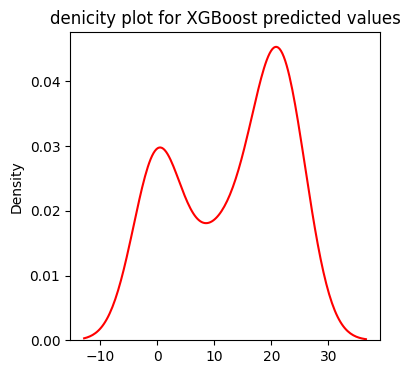

In [ ]:
plt.figure(figsize=(4,4))
sns.distplot(y_pred_xgb,color='red',hist=False)
plt.title('denicity plot for XGBoost predicted values')
plt.show()

<font color=red>Model evaluation for XG Boost

In [ ]:
from sklearn import metrics
print('MAE',metrics.mean_absolute_error(y_test,y_pred_xgb))
print('*'*160)
print('MSE',metrics.mean_squared_error(y_test,y_pred_xgb))
print('*'*160)
print('RMSE',np.sqrt(metrics.mean_absolute_error(y_test,y_pred_xgb)))

MAE 0.2921048794180806
****************************************************************************************************************************************************************
MSE 0.2483239363046703
****************************************************************************************************************************************************************
RMSE 0.540467278767254


<font color=red>Use of gridsearch CV for hyper parameter tune the model

In [ ]:
from sklearn.model_selection import GridSearchCV
xgb_tuned=XGBRegressor()
param_grid={"learning_rate": (0.05, 0.10, 0.15),
             "max_depth": [ 3, 4, 5, 6, 8],
             "min_child_weight": [ 1, 3, 5, 7],
             "gamma":[ 0.0, 0.1, 0.2],
             "colsample_bytree":[ 0.3, 0.4]
            }
grid_xgb= GridSearchCV(estimator=xgb_tuned, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

In [ ]:
grid_xgb.fit(x_train,y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4],
                         'gamma': [0.0, 0.1, 0.2],
                         'learning_rate': (0.05, 0.1, 0.15),
                         'max_depth': [3, 4, 5, 6, 8],
                         'min_child_weight': [1, 3, 5, 7]},
             verbose=2)

In [ ]:
grid_xgb.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0.0,
 'learning_rate': 0.15,
 'max_depth': 3,
 'min_child_weight': 7}

In [ ]:
grid_xgb.best_score_

0.9758187709019602

In [ ]:
xgb_grid_tune=XGBRegressor(colsample_bytree= 0.3, gamma= 0.0, learning_rate= 0.15, max_depth= 3, min_child_weight= 7)

In [ ]:
xgb_grid_tune.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_pred_tuned=xgb_grid_tune.predict(x_test)
y_pred_tuned

array([20.562695  , -0.4792407 ,  1.376362  , -0.19097064, 18.176943  ,
        0.56812257, 21.07247   , -0.11570577, 21.636858  , 18.792196  ,
        0.4014484 , 17.360891  ,  1.0997372 ,  9.426155  , 19.168804  ,
       -0.24635343,  0.6204311 ,  9.943827  , 23.973051  ,  0.7336802 ,
       21.768196  , 18.718908  , 15.761483  ,  6.905046  , 23.479126  ,
       20.04522   , 22.551653  , 19.809963  , -0.0749888 , 21.104065  ,
       20.944061  ,  0.9681356 ,  8.819206  , 20.39984   , 21.983334  ,
        0.0386649 , 23.797483  , 18.074732  , 19.551792  , -0.34015173,
        9.984814  , 23.264711  ,  0.6641785 , -0.5875427 , 23.314821  ,
       13.558476  , 21.448683  , 21.53708   , 14.171505  ,  8.017304  ,
       23.147074  , 17.8705    , 22.73653   , 14.360041  , 15.21966   ,
        0.69141394], dtype=float32)

In [ ]:
xgb_grid_tune.score(x_train,y_train)

0.9976907438848898

In [ ]:
xgb_grid_tune.score(x_test,y_pred_tuned)

1.0

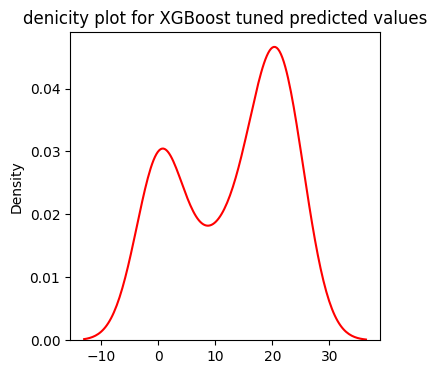

In [ ]:
plt.figure(figsize=(4,4))
sns.distplot(y_pred_tuned_xgb,color='red',hist=False)
plt.title('denicity plot for XGBoost tuned predicted values')
plt.show()

<font color=red>model evaluation for tuned XGB

In [ ]:
from sklearn import metrics
print('MAE',metrics.mean_absolute_error(y_test,y_pred_tuned))
print('*'*160)
print('MSE',metrics.mean_squared_error(y_test,y_pred_tuned))
print('*'*160)
print('RMSE',np.sqrt(metrics.mean_absolute_error(y_test,y_pred_tuned)))

MAE 0.6059366995335697
****************************************************************************************************************************************************************
MSE 0.5929485855010876
****************************************************************************************************************************************************************
RMSE 0.7784193596857478


# <font color=green>Comparission of all the model

In [ ]:
y_pred=pd.DataFrame(y_pred,columns=['predicted_linear'])
y_pred_lasso=pd.DataFrame(y_pred_lasso,columns=['prediction_lasso'])
y_pred_dt=pd.DataFrame(y_pred_dt,columns=['predicted_dt'])
y_pred_grid_dt=pd.DataFrame(y_pred_grid_dt,columns=['predicted_dt_grid'])
y_pred_rf=pd.DataFrame(y_pred_rf,columns=['predicted_rf'])
y_pred_tuned_rf=pd.DataFrame(y_pred_tuned_rf,columns=['predicted_rf_tuned'])
y_pred_xgb=pd.DataFrame(y_pred_xgb,columns=['predicted_xgb'])
y_pred_tuned_xgb=pd.DataFrame(y_pred_tuned,columns=['predicted_xgb_grid'])

In [ ]:
new=[y_pred,y_pred_lasso,y_pred_dt,y_pred_grid_dt,y_pred_rf,y_pred_tuned_rf,y_pred_xgb,y_pred_tuned_xgb]
result=pd.concat(new,axis=1)
result.head()

predicted_linear  prediction_lasso  predicted_dt  predicted_dt_grid  \
0         22.599717         25.302876       21.8000          22.711143   
1          1.793336          5.328220        0.0000           0.000000   
2          1.251205          5.143281        0.0000           0.000000   
3          2.372716          5.878267        0.0000           0.000000   
4         18.730705         15.579993       17.8025          17.725978   

   predicted_rf  predicted_rf_tuned  predicted_xgb  predicted_xgb_grid  
0     21.312825           21.158976      21.227884           20.562695  
1      0.000000            0.084671      -0.009527           -0.479241  
2      0.000000            0.760643      -0.050274            1.376362  
3      0.095000            1.926485       0.004921           -0.190971  
4     17.858625           17.733506      17.989958           18.176943

# <font color=green>Conclusion:
# <font color=green>From the evaluation of the all model its concluded that XGBboost without hyper parameter tuning shows least RMSE value so this is the best model to predict the BTE values for the given table
